In [1]:
!pip install num2words
!pip install pyvi
!pip install underthesea
!pip install langid
!pip install vietnam-number


  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 143.3/143.3 kB 7.1 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=dc09ec3af531b27bd7d6248a41e4f19ab4955333703a7df1cebfbe38427486a4
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.5/8.5 MB 39.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.2/1.2 MB 33.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20.9/20.9 MB 72.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from underthesea import word_tokenize
import unicodedata
import string
import re
import regex
import string
from wordcloud import WordCloud
import operator
import spacy
import joblib as jlb

from underthesea import word_tokenize, pos_tag, sent_tokenize as vie_sent
from pyvi import ViPosTagger, ViTokenizer, ViUtils

import langid
from vietnam_number import n2w
import num2words
from collections import Counter

In [3]:
from google.colab import drive
drive.mount('/content/drive') # Assuming you want to mount it to '/content/drive'

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/CGV reviews sentiment csv.csv')
df

reviewer            time  \
0             Huy·ªÅn Nguy·ªÖn   3 th√°ng tr∆∞·ªõc   
1         ƒê·∫°t Nguy·ªÖn Th√†nh   9 th√°ng tr∆∞·ªõc   
2         Kh√°nh L√¢m Nguy·ªÖn   m·ªôt nƒÉm tr∆∞·ªõc   
3           L√Ω Thanh Phong   4 th√°ng tr∆∞·ªõc   
4            Anh Di·ªáp Ph√∫c  10 th√°ng tr∆∞·ªõc   
...                    ...             ...   
6077  Y·∫øn kh·ªèe ƒë·∫πp Youtube   9 th√°ng tr∆∞·ªõc   
6078       Kemasta Genhiro   m·ªôt nƒÉm tr∆∞·ªõc   
6079       D∆∞∆°ng VƒÉn Th·∫≥ng   m·ªôt nƒÉm tr∆∞·ªõc   
6080  Chanchal Mohit (Myk)     6 nƒÉm tr∆∞·ªõc   
6081               Anh Cao     7 nƒÉm tr∆∞·ªõc   

                                                context  ranking  \
0     M√¨nh ƒë√£ ƒë·∫∑t v√© tr∆∞·ªõc qua app, khi ƒë·∫øn l·∫•y v√© l...        1   
1     R·∫°p qu√° n√≥ng xem phim m·∫•y l·∫ßn qu√° n√≥ng , g√≥p √Ω...        1   
2     Mua v√© kh√¥ng h·ªèi tr·∫ª em hay ng∆∞·ªùi l·ªõn, c·ª© th·∫ø ...        1   
3     Nh√¢n vi√™n v√¥ duy√™n, thi·∫øu th√¢n thi·ªán v√† ƒë·ª©ng c...        1   
4     M√¨nh ƒëi xem phim su·∫•t 9h. Nh∆∞ng 9h05 v·∫´n ch∆∞a ...        1   
...                                                 ...      ...   
6077  Xem r·∫°p kh√° th√∫ v·ªã, b·ªëi c·∫£nh xem t·ªët.\nR·∫°p c√≥ ...        5   
6078  Deco ƒë·∫πp, gh·∫ø ng·ªìi tho·∫£i m√°i, √¢m thanh ·ªïn, kh√¥...        5   
6079  N√≥i chung Ok nh∆∞ c√°c r·∫°p kh√°c\nC√≥ 3D\nToilet c...        5   
6080  N∆°i m√°t m·∫ª. ƒê·∫∑t v√© b·∫±ng t√†i kho·∫£n tr·ª±c tuy·∫øn g...        5   
6081     N∆°i s·∫°ch s·∫Ω, nhi·ªÅu c·ª≠a h√†ng v√† r·∫•t nhi·ªÅu ng∆∞·ªùi        5   

               Chi nh√°nh  Sentiment  
0      CGV Ho√†ng VƒÉn Th·ª•          0  
1       CGV Satra C·ªß Chi          0  
2       CGV Pandora City          0  
3        CGV S∆∞ V·∫°n H·∫°nh          0  
4     CGV Vincom Th·ªß ƒê·ª©c          0  
...                  ...        ...  
6077  CGV Vincom Th·ªß ƒê·ª©c          1  
6078  CGV Vincom Th·ªß ƒê·ª©c          1  
6079  CGV L√Ω Ch√≠nh Th·∫Øng          1  
6080              CGV CT          1  
6081     CGV Pearl Plaza          1  

[6082 rows x 6 columns]

### **EDA**

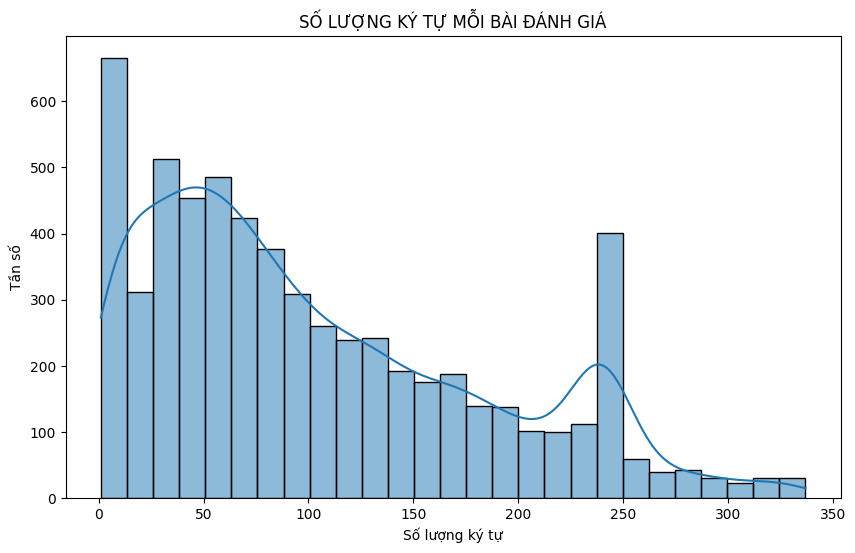

In [5]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(df['context'].str.len(), kde=True) # Use histplot for better visualization

# Customize the plot (optional)
plt.title('S·ªê L∆Ø·ª¢NG K√ù T·ª∞ M·ªñI B√ÄI ƒê√ÅNH GI√Å')
plt.xlabel('S·ªë l∆∞·ª£ng k√Ω t·ª±')
plt.ylabel('T·∫ßn s·ªë')
plt.show()


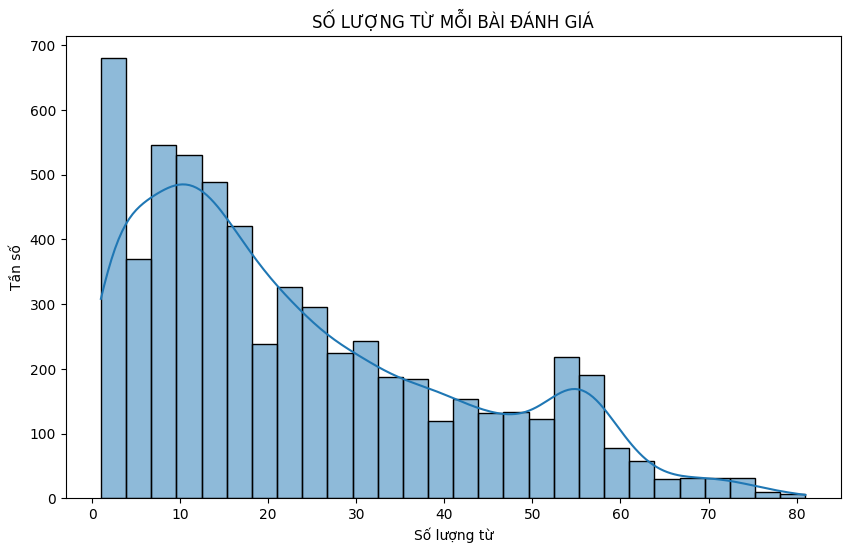

In [6]:
# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(df['context'].str.split().map(lambda x: len(x)), kde=True) # Use histplot for better visualization

# Customize the plot (optional)
plt.title('S·ªê L∆Ø·ª¢NG T·ª™ M·ªñI B√ÄI ƒê√ÅNH GI√Å')
plt.xlabel('S·ªë l∆∞·ª£ng t·ª´')
plt.ylabel('T·∫ßn s·ªë')
plt.show()

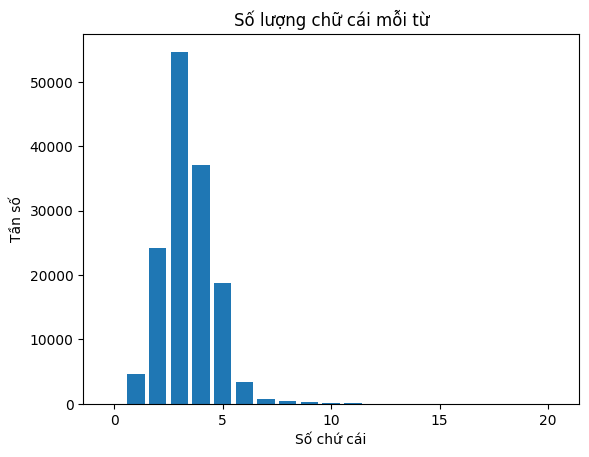

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate the number of characters in each word of the 'context' column
df['word_lengths'] = df['context'].apply(lambda x: [len(word) for word in x.split()])

# Flatten the list of word lengths into a single series
all_word_lengths = [length for sublist in df['word_lengths'] for length in sublist]

# Create a histogram of word lengths
plt.hist(all_word_lengths, bins=np.arange(0, max(all_word_lengths) + 2) - 0.5, align='mid', rwidth=0.8)

# Customize the plot
plt.title('S·ªë l∆∞·ª£ng ch·ªØ c√°i m·ªói t·ª´')
plt.xlabel('S·ªë ch·ª© c√°i')
plt.ylabel('T·∫ßn s·ªë')

# Display the plot
plt.show()

df.drop(columns='word_lengths', inplace = True)

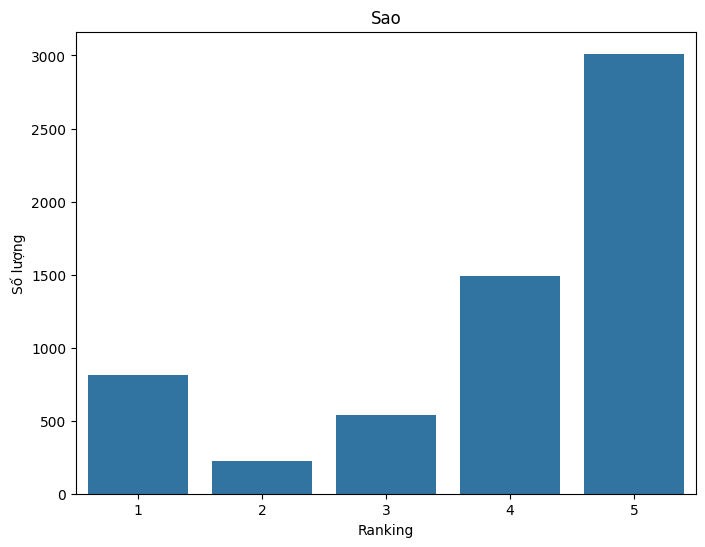

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ranking', data=df)
plt.xlabel("Ranking")
plt.ylabel("S·ªë l∆∞·ª£ng")
plt.title("Sao")
plt.show()

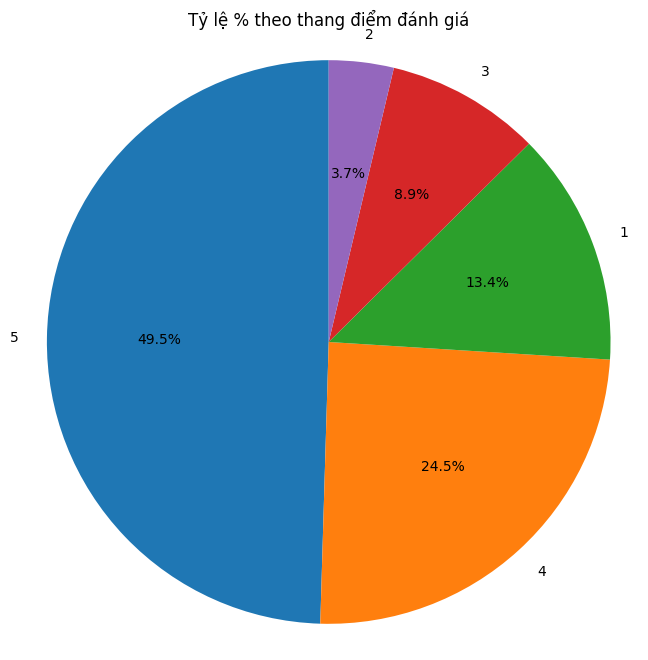

In [9]:
# Count the occurrences of each ranking value
ranking_counts = df['ranking'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(ranking_counts, labels=ranking_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('T·ª∑ l·ªá % theo thang ƒëi·ªÉm ƒë√°nh gi√°')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


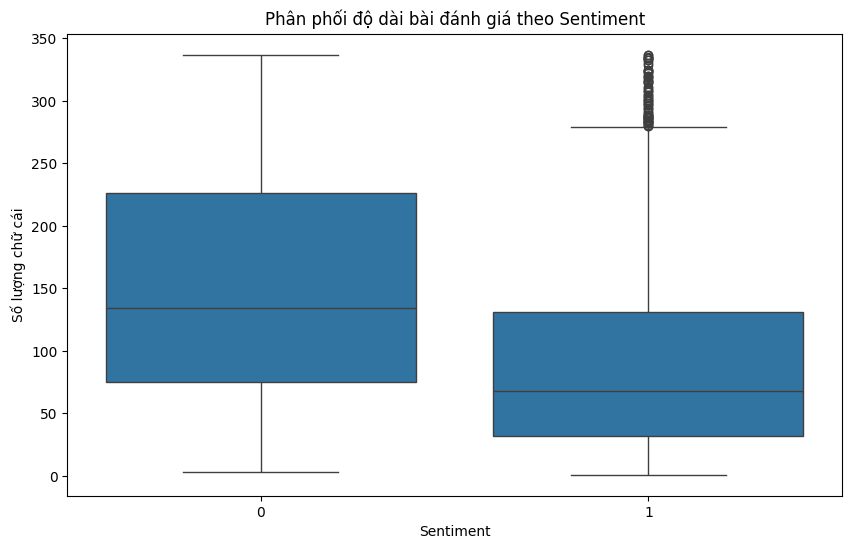

In [10]:
# Calculate the length of the 'context' column
df['context_length'] = df['context'].str.len()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='context_length', data=df)
plt.title('Ph√¢n ph·ªëi ƒë·ªô d√†i b√†i ƒë√°nh gi√° theo Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('S·ªë l∆∞·ª£ng ch·ªØ c√°i')
plt.show()

df.drop(columns = 'context_length', inplace = True)

### **TI·ªÄN X·ª¨ L√ù D·ªÆ LI·ªÜU**

In [11]:
def normalize_vietnamese(text):
    return unicodedata.normalize('NFKC', text)

def remove_special_patterns(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Lo·∫°i b·ªè URL
    text = re.sub(r'\S+@\S+', '', text)                 # Lo·∫°i b·ªè email
    return text

def loai_dau(text):
    # Thay th·∫ø t·∫•t c·∫£ chu·ªói d·∫•u ch·∫•m li√™n ti·∫øp (2 ho·∫∑c nhi·ªÅu d·∫•u ch·∫•m) th√†nh m·ªôt kho·∫£ng tr·∫Øng
    text = re.sub(r'\.{2,}', ' ', text)  # \.{2,} t√¨m t·∫•t c·∫£ d·∫•u '.' li√™n ti·∫øp (>=2)
    special_char = [':',')','(','.',',',';','!','?','‚Ä¶','/','\\','|','-','_']
    for char in special_char:
        text = text.replace(char, ' ') # Use str.replace directly
    return text


def remove_emoji(text):
    emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"
                              u"\U0001F300-\U0001F5FF"
                              u"\U0001F680-\U0001F6FF"
                              u"\U0001F700-\U0001F77F"
                              u"\U0001F780-\U0001F7FF"
                              u"\U0001F800-\U0001F8FF"
                              u"\U0001F900-\U0001F9FF"
                              u"\U0001FA00-\U0001FA6F"
                              u"\U0001FA70-\U0001FAFF"
                              u"\U00002702-\U000027B0"
                              u"\U000024C2-\U0001F251"
                              "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def preprocess(text):
    text = remove_special_patterns(text)  # Lo·∫°i b·ªè URL, email
    text = loai_dau(text)       # Lo·∫°i b·ªè d·∫•u c√¢u
    text = remove_emoji(text)             # Lo·∫°i b·ªè emoji
    text = normalize_vietnamese(text)     # Chu·∫©n h√≥a ti·∫øng Vi·ªát
    text = text.lower()                   # Chuy·ªÉn th√†nh ch·ªØ th∆∞·ªùng
    return text


In [12]:
df['pre_context'] = df['context'].apply(preprocess)
df.head(5)

reviewer            time  \
0      Huy·ªÅn Nguy·ªÖn   3 th√°ng tr∆∞·ªõc   
1  ƒê·∫°t Nguy·ªÖn Th√†nh   9 th√°ng tr∆∞·ªõc   
2  Kh√°nh L√¢m Nguy·ªÖn   m·ªôt nƒÉm tr∆∞·ªõc   
3    L√Ω Thanh Phong   4 th√°ng tr∆∞·ªõc   
4     Anh Di·ªáp Ph√∫c  10 th√°ng tr∆∞·ªõc   

                                             context  ranking  \
0  M√¨nh ƒë√£ ƒë·∫∑t v√© tr∆∞·ªõc qua app, khi ƒë·∫øn l·∫•y v√© l...        1   
1  R·∫°p qu√° n√≥ng xem phim m·∫•y l·∫ßn qu√° n√≥ng , g√≥p √Ω...        1   
2  Mua v√© kh√¥ng h·ªèi tr·∫ª em hay ng∆∞·ªùi l·ªõn, c·ª© th·∫ø ...        1   
3  Nh√¢n vi√™n v√¥ duy√™n, thi·∫øu th√¢n thi·ªán v√† ƒë·ª©ng c...        1   
4  M√¨nh ƒëi xem phim su·∫•t 9h. Nh∆∞ng 9h05 v·∫´n ch∆∞a ...        1   

            Chi nh√°nh  Sentiment  \
0   CGV Ho√†ng VƒÉn Th·ª•          0   
1    CGV Satra C·ªß Chi          0   
2    CGV Pandora City          0   
3     CGV S∆∞ V·∫°n H·∫°nh          0   
4  CGV Vincom Th·ªß ƒê·ª©c          0   

                                         pre_context  
0  m√¨nh ƒë√£ ƒë·∫∑t v√© tr∆∞·ªõc qua app  khi ƒë·∫øn l·∫•y v√© l...  
1  r·∫°p qu√° n√≥ng xem phim m·∫•y l·∫ßn qu√° n√≥ng   g√≥p √Ω...  
2  mua v√© kh√¥ng h·ªèi tr·∫ª em hay ng∆∞·ªùi l·ªõn  c·ª© th·∫ø ...  
3  nh√¢n vi√™n v√¥ duy√™n  thi·∫øu th√¢n thi·ªán v√† ƒë·ª©ng c...  
4  m√¨nh ƒëi xem phim su·∫•t 9h  nh∆∞ng 9h05 v·∫´n ch∆∞a ...

## **B·ªè Stopword**

In [13]:
file_path = '/content/vietnamese-stopwords.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    vn_stopwords = file.readlines()

# Lo·∫°i b·ªè k√Ω t·ª± xu·ªëng d√≤ng (\n) n·∫øu c·∫ßn
vn_stopwords = [word.strip() for word in vn_stopwords]


In [14]:
df['pre_context'] = df['pre_context'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in vn_stopwords]))

In [15]:
df['pre_context'].head(5)

0    v√© app v√© h∆∞·ªõng ph√≤ng chi·∫øu r·∫°p 2 t·∫ßng t·∫ßng 1 ...
1    r·∫°p n√≥ng phim m·∫•y n√≥ng g√≥p kh·∫Øc ph·ª•c g√≥p c√¥ng ...
2       mua v√© tr·∫ª ti·ªÅn bill ƒë·ªìng v√© h·ªá th·ªëng h·ªá th·ªëng
3    nh√¢n vi√™n v√¥ duy√™n th√¢n thi·ªán ƒë·ª©ng h·ªó tr·ª£ h√†ng...
4     ƒëi phim su·∫•t 9h 9h05 qu·∫ßy v√© h·ªâ b·∫Øp qu·∫£n l√Ω t·ªá 2
Name: pre_context, dtype: object

## **Ki·ªÉm tra c√°c t·ª´ c√≥ ƒë·ªô d√†i > 7**

In [16]:
long_words_list = []

# Iterate through the 'pre_context' column
for text in df['pre_context']:
    # Check if the text is a string (handle potential missing values or other data types)
    if isinstance(text, str):
        # Split the text into words
        words = text.split()
        # Iterate through the words
        for word in words:
            # Check if the word length is greater than 7
            if len(word) > 7:
                long_words_list.append(word)
    else:
        # Handle cases where 'text' is not a string
        pass  # You can choose to skip these or add a placeholder

# Print the list of long words
print(long_words_list)

['complain', 'saturday', 'complain', 'complain', 'spiderman', 'training', 'doraemon', 'training', 'hollywoood', 'seriously', 'complain', 'transformer', 'doraemon', 'training', 'citypoint', 'boogeyman', 'sweetbox', 'merchanise', 'preminum', 'doraemon', 'doraemon', 'doraemon', 'cresscent', 'training', 'academia', 'doraemon', 'oppenheimer', 'birthday', 'impossible', 'oppenheimer', '‚Äúcheating‚Äù', 'training', 'landmark', 'landmark', 'doraemon', 'sweetbox', 'doraemon', 'impossible', 'tranning', '"infinity', 'training', 'landmark', 'gladiator', 'recommend', 'comeback', 'gigamail', 'despicable', 'crescent', 'landmark', 'tranformer', 'citipoint', 'california', '289k+89k', 'landmark', 'doreamon', 'landmark', 'bardcode', 'avengers', 'training', 'sweetbox', 'sweetbox', 'training', 'oppenheimer', '13h40phut', 'takashimaya', 'vinhomes', 'ticketbox', 'complain', 'samsungpay', 'vinhomes', 'tokbokki', 'backdrop', 'deadpool', 'makerting', 'cinestar', 'crescent', 'kingkong', 'infinity', 'trainning', '

## **Word Tokenize**

In [17]:
def wt(sentence):
    tokens = ViTokenizer.tokenize(sentence).split()
    return tokens

In [18]:
df['tokens'] = df.apply(lambda row: wt(row['pre_context']), axis=1)
print(df['tokens'])

0       [v√©, app, v√©, h∆∞·ªõng, ph√≤ng, chi·∫øu, r·∫°p, 2, t·∫ßn...
1       [r·∫°p, n√≥ng, phim, m·∫•y, n√≥ng, g√≥p, kh·∫Øc_ph·ª•c, g...
2       [mua, v√©, tr·∫ª, ti·ªÅn, bill, ƒë·ªìng, v√©, h·ªá_th·ªëng,...
3       [nh√¢n_vi√™n, v√¥_duy√™n, th√¢n_thi·ªán, ƒë·ª©ng, h·ªó_tr·ª£...
4       [ƒëi, phim, su·∫•t, 9h, 9h05, qu·∫ßy, v√©, h·ªâ, b·∫Øp, ...
                              ...                        
6077    [r·∫°p, th√∫_v·ªã, b·ªëi_c·∫£nh, r·∫°p, b·∫Øp, ƒëi, chi·∫øu, x...
6078    [deco, ƒë·∫πp, gh·∫ø, tho·∫£i_m√°i, √¢m, ·ªïn, gian, ·∫•m_c...
6079                     [ok, r·∫°p, 3d, toilet, h∆°i, ƒë√¥ng]
6080         [m√°t_m·∫ª, v√©, t√†i_kho·∫£n, tr·ª±c_tuy·∫øn, gi√°, r·∫ª]
6081                                     [s·∫°ch, c·ª≠a_h√†ng]
Name: tokens, Length: 6082, dtype: object


In [19]:
vietnamese_tokens_list = [token for sublist in df['tokens'].tolist() for token in sublist]
print("Vietnamese Tokens:", vietnamese_tokens_list)

Vietnamese Tokens: ['v√©', 'app', 'v√©', 'h∆∞·ªõng', 'ph√≤ng', 'chi·∫øu', 'r·∫°p', '2', 't·∫ßng', 't·∫ßng', '1', 'nh√¢n_vi√™n', 't·∫ßng', '2', 'coi', 'n·ª≠a', 'phim', 't·∫Øt', 'ƒë√®n', 'nh√¢n_vi√™n', 'l·∫ßu', '2', 'coi', 'phim', 'conan', 'ch·∫≥ng', 'l·∫ª', 'ch·∫°y', 't·∫ßng', '1', 't·∫Øt_ƒë√®n', 'r·∫°p', 'n√≥ng', 'phim', 'm·∫•y', 'n√≥ng', 'g√≥p', 'kh·∫Øc_ph·ª•c', 'g√≥p', 'c√¥ng_khai', 't·∫£ng', 'nha', 'mua', 'v√©', 'tr·∫ª', 'ti·ªÅn', 'bill', 'ƒë·ªìng', 'v√©', 'h·ªá_th·ªëng', 'h·ªá_th·ªëng', 'nh√¢n_vi√™n', 'v√¥_duy√™n', 'th√¢n_thi·ªán', 'ƒë·ª©ng', 'h·ªó_tr·ª£', 'h√†ng', 'b·∫•t_k·ª≥', 'v·∫•n_ƒë·ªÅ', 'ngo·∫°i_tr·ª´', 'h√†ng', 'xong', 'th√®m', 't√¢m', 'ƒëi', 'phim', 'su·∫•t', '9h', '9h05', 'qu·∫ßy', 'v√©', 'h·ªâ', 'b·∫Øp', 'qu·∫£n_l√Ω', 't·ªá', '2', 'r·∫°p', 'm√£', '∆∞u_ƒë√£i', 'galaxy', 'nh√¢n_vi√™n', 'check', 'xong', 'b√°o', 'th√†nh_c√¥ng', 'k√™u', 'm√£', 'ƒë·ªì', 'ƒëi', 'k√®m', 'ko', 'ƒë·ªôi', 'ti·ªÅn', 'kinh_kh·ªßng', 'k√™u', '2', 'ly', 'b√¨nh', 'kh·ªëng', 'k√®m', 'combo', 'gi√°', '199

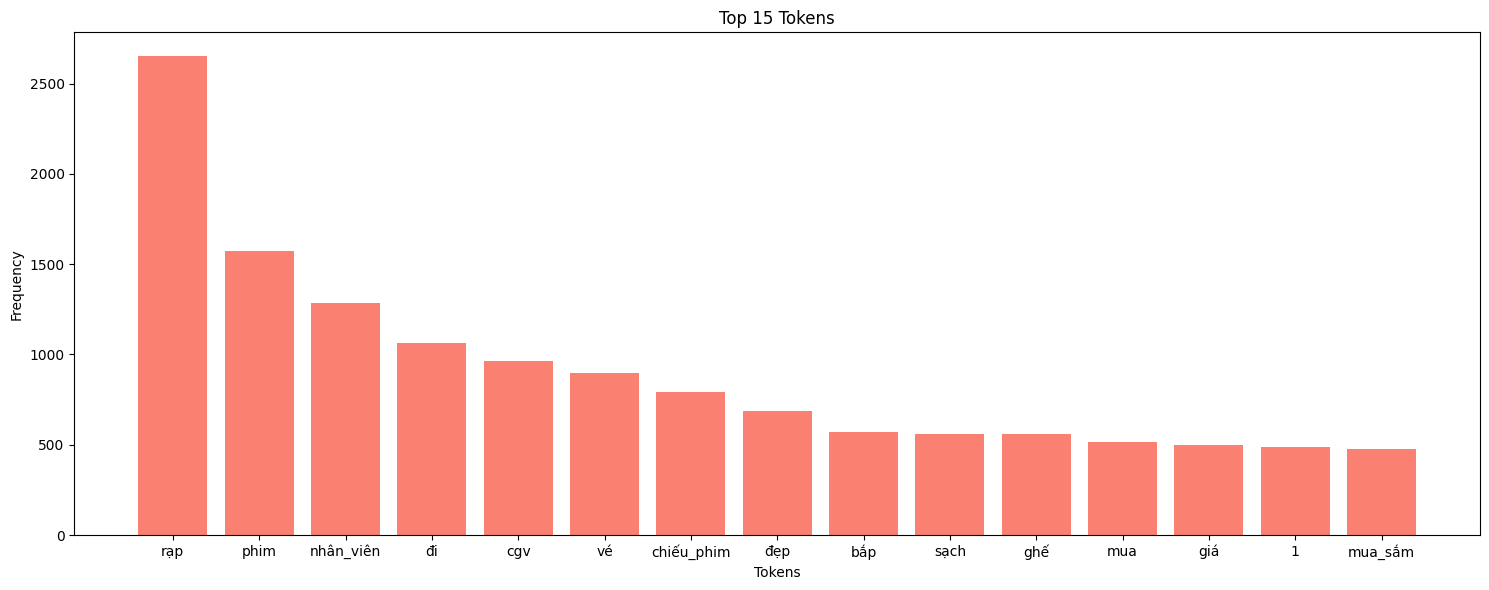

In [20]:
# Count the frequency of tokens in each list
vietnamese_token_counts = Counter(vietnamese_tokens_list)

# Get the top 15 most frequent tokens
top_15_vietnamese_tokens = dict(vietnamese_token_counts.most_common(15))

plt.figure(figsize=(15, 6))  # Optional: Adjust figure size
plt.bar(top_15_vietnamese_tokens.keys(), top_15_vietnamese_tokens.values(), color='salmon')
plt.title('Top 15 Tokens')  # Set title using plt.title
plt.xlabel('Tokens')  # Set x-axis label using plt.xlabel
plt.ylabel('Frequency')  # Set y-axis label using plt.ylabel

plt.tight_layout()
plt.show()

## **WORD CLOUD**

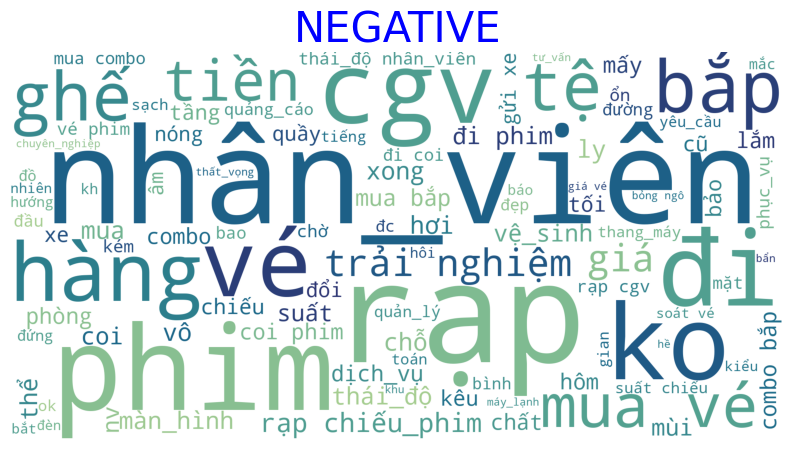

In [21]:
from wordcloud import WordCloud
# Define the black_color_func
def black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "black"  # All words will be black

# Flatten the list of tokens into a single string
cloud = df[df['Sentiment'] == 0]['tokens'].apply(lambda x: ' '.join(x)).str.cat(sep=' ')

# Generate the WordCloud
plt.figure(figsize=(10, 8))
word_cloud = WordCloud( # Use WordCloud directly instead of wordcloud.WordCloud
    max_words=100,
    colormap=sns.color_palette("crest", as_cmap=True),
    background_color="white",
    width=2000,
    height=1000
).generate(cloud)  # Use the flattened cloud string

# Display the WordCloud
plt.axis("off")
plt.imshow(word_cloud)
plt.title('NEGATIVE', fontdict={'fontsize': 30, 'color': 'blue'})
plt.show()

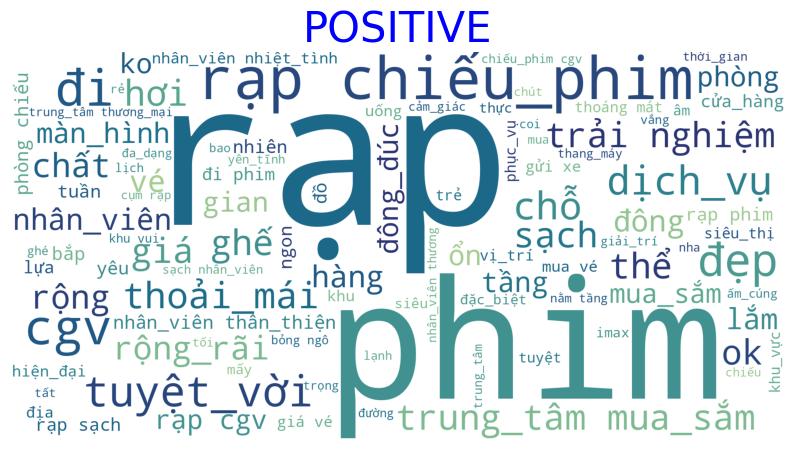

In [22]:
from wordcloud import WordCloud
# Define the black_color_func
def black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "black"  # All words will be black

# Flatten the list of tokens into a single string
cloud = df[df['Sentiment'] == 1]['tokens'].apply(lambda x: ' '.join(x)).str.cat(sep=' ')

# Generate the WordCloud
plt.figure(figsize=(10, 8))
word_cloud = WordCloud( # Use WordCloud directly instead of wordcloud.WordCloud
    max_words=100,
    colormap=sns.color_palette("crest", as_cmap=True),
    background_color="white",
    width=2000,
    height=1000
).generate(cloud)  # Use the flattened cloud string

# Display the WordCloud
plt.axis("off")
plt.imshow(word_cloud)
plt.title('POSITIVE', fontdict={'fontsize': 30, 'color': 'blue'})
plt.show()

## *PH√ÇN T√çCH B√åNH LU·∫¨N TI√äU C·ª∞C*

In [23]:
time_list = list(df['time'].unique())
print(time_list)

['3 th√°ng tr∆∞·ªõc', '9 th√°ng tr∆∞·ªõc', 'm·ªôt nƒÉm tr∆∞·ªõc', '4 th√°ng tr∆∞·ªõc', '10 th√°ng tr∆∞·ªõc', '5 nƒÉm tr∆∞·ªõc', '2 th√°ng tr∆∞·ªõc', '2 nƒÉm tr∆∞·ªõc', '7 nƒÉm tr∆∞·ªõc', '6 th√°ng tr∆∞·ªõc', '7 th√°ng tr∆∞·ªõc', 'm·ªôt th√°ng tr∆∞·ªõc', '4 nƒÉm tr∆∞·ªõc', '6 nƒÉm tr∆∞·ªõc', '8 th√°ng tr∆∞·ªõc', '5 th√°ng tr∆∞·ªõc', '3 tu·∫ßn tr∆∞·ªõc', '3 ng√†y tr∆∞·ªõc', '2 tu·∫ßn tr∆∞·ªõc', '11 th√°ng tr∆∞·ªõc', '8 nƒÉm tr∆∞·ªõc', '3 nƒÉm tr∆∞·ªõc', 'm·ªôt tu·∫ßn tr∆∞·ªõc', '4 tu·∫ßn tr∆∞·ªõc', '5 ng√†y tr∆∞·ªõc', '6 ng√†y tr∆∞·ªõc', '9 nƒÉm tr∆∞·ªõc', '4 ng√†y tr∆∞·ªõc', '11 nƒÉm tr∆∞·ªõc']


In [24]:
def convert_to_days(time_str):
    # Chuy·ªÉn ƒë·ªïi s·ªë t·ª´ ti·∫øng Vi·ªát sang s·ªë nguy√™n
    vietnamese_numbers = {
        "m·ªôt": 1, "hai": 2, "ba": 3, "b·ªën": 4, "nƒÉm": 5, "s√°u": 6, "b·∫£y": 7,
        "t√°m": 8, "ch√≠n": 9, "m∆∞·ªùi": 10, "m∆∞·ªùi m·ªôt": 11, "m∆∞·ªùi hai": 12
    }

    # T√¨m s·ªë trong chu·ªói
    match = re.match(r"(\d+|m·ªôt|hai|ba|b·ªën|nƒÉm|s√°u|b·∫£y|t√°m|ch√≠n|m∆∞·ªùi|m∆∞·ªùi m·ªôt|m∆∞·ªùi hai)", time_str)
    if not match:
        return float('inf')  # Tr·∫£ v·ªÅ gi√° tr·ªã l·ªõn nh·∫•t n·∫øu kh√¥ng x√°c ƒë·ªãnh ƒë∆∞·ª£c

    # L·∫•y s·ªë l∆∞·ª£ng
    quantity = match.group(1)
    if quantity in vietnamese_numbers:
        quantity = vietnamese_numbers[quantity]
    else:
        quantity = int(quantity)

    # X√°c ƒë·ªãnh ƒë∆°n v·ªã th·ªùi gian
    if "nƒÉm" in time_str:
        return quantity * 365
    elif "th√°ng" in time_str:
        return quantity * 30
    elif "tu·∫ßn" in time_str:
        return quantity * 7
    elif "ng√†y" in time_str:
        return quantity
    else:
        return float('inf')  # Tr·∫£ v·ªÅ gi√° tr·ªã l·ªõn nh·∫•t n·∫øu kh√¥ng x√°c ƒë·ªãnh ƒë∆∞·ª£c

# S·∫Øp x·∫øp danh s√°ch
sorted_time_list = sorted(time_list, key=convert_to_days, reverse=False)

# K·∫øt qu·∫£
print(sorted_time_list)


['3 ng√†y tr∆∞·ªõc', '4 ng√†y tr∆∞·ªõc', '5 ng√†y tr∆∞·ªõc', '6 ng√†y tr∆∞·ªõc', 'm·ªôt tu·∫ßn tr∆∞·ªõc', '2 tu·∫ßn tr∆∞·ªõc', '3 tu·∫ßn tr∆∞·ªõc', '4 tu·∫ßn tr∆∞·ªõc', 'm·ªôt th√°ng tr∆∞·ªõc', '2 th√°ng tr∆∞·ªõc', '3 th√°ng tr∆∞·ªõc', '4 th√°ng tr∆∞·ªõc', '5 th√°ng tr∆∞·ªõc', '6 th√°ng tr∆∞·ªõc', '7 th√°ng tr∆∞·ªõc', '8 th√°ng tr∆∞·ªõc', '9 th√°ng tr∆∞·ªõc', '10 th√°ng tr∆∞·ªõc', '11 th√°ng tr∆∞·ªõc', 'm·ªôt nƒÉm tr∆∞·ªõc', '2 nƒÉm tr∆∞·ªõc', '3 nƒÉm tr∆∞·ªõc', '4 nƒÉm tr∆∞·ªõc', '5 nƒÉm tr∆∞·ªõc', '6 nƒÉm tr∆∞·ªõc', '7 nƒÉm tr∆∞·ªõc', '8 nƒÉm tr∆∞·ªõc', '9 nƒÉm tr∆∞·ªõc', '11 nƒÉm tr∆∞·ªõc']


In [28]:
# T√¨m nh·ªØng review c√≥ sentiment = 0, ch·ª©a t·ª´ 'r·∫°p'
cinema_reviews = df[(df['Sentiment'] == 0) & df['tokens'].apply(lambda x: 'r·∫°p' in x)]

# S·∫Øp x·∫øp theo th·ª© t·ª± th·ªùi gian d·ª±a tr√™n danh s√°ch sorted_time_list
cinema_reviews['time_index'] = cinema_reviews['time'].apply(lambda x: sorted_time_list.index(x))
cinema_reviews = cinema_reviews.sort_values(by='time_index', ascending=True)

# Hi·ªÉn th·ªã c√°c c·ªôt li√™n quan
cinema_reviews[['reviewer','context','time','Sentiment']]

reviewer                                            context  \
937      Tuy·∫øt Tuy·∫øt  H√¥m nay m√¨nh coi su·∫•t 21h20 Moana r·∫°p 01 phim ...   
1018          Nam Le  Mua v√© online, ƒë√£ c√≥ v√© ƒëi·ªán t·ª≠ m√† l·∫°i ph·∫£i ra...   
166         Duy Dang  N√†y, n·∫øu b·∫°n kh√¥ng th·ªÉ b·∫≠t AC sau 10 gi·ªù t·ªëi, ...   
2952          Anh Do  R·∫°p nh·ªè, t∆∞∆°ng ƒë·ªëi √≠t su·∫•t chi·∫øu v√† v·∫±ng v·∫ª; r...   
316   long van thuan  Nh√¢n vi√™n kh√¥ng nhi·ªát t√¨nh, cho 1 sao, r·∫°p ng√†...   
...              ...                                                ...   
1118         Huy Mai            R·∫°p chi·∫øu phim r·∫•t nh·ªè. Ph·∫£i ƒë·∫∑t tr∆∞·ªõc.   
2857    Andrew Ayres  Nh·ªè h∆°n m·ªôt s·ªë r·∫°p chi·∫øu phim kh√°c mang l·∫°i c·∫£...   
1196     Thang Trinh  Kh√¥ng gian ƒë·∫πp, hi·ªán ƒë·∫°i, ch·∫•t l∆∞·ª£ng ph√≤ng chi...   
940    Thu·∫≠n Ph·∫°m T∆∞  Gh·∫ø nh·ªè, ng·ªìi m·ªèi c·ªï v√† kh√¥ng tho·∫£i m√°i. R·∫°p p...   
2161      S∆°n Nguy·ªÖn         R·∫°p v·∫Øng, nh·ªè. N√≥i chung l√† t·∫°m ch·∫•p nh·∫≠n.   

                time  Sentiment  
937     5 ng√†y tr∆∞·ªõc          0  
1018    6 ng√†y tr∆∞·ªõc          0  
166   m·ªôt tu·∫ßn tr∆∞·ªõc          0  
2952  m·ªôt tu·∫ßn tr∆∞·ªõc          0  
316   m·ªôt tu·∫ßn tr∆∞·ªõc          0  
...              ...        ...  
1118     8 nƒÉm tr∆∞·ªõc          0  
2857     8 nƒÉm tr∆∞·ªõc          0  
1196     8 nƒÉm tr∆∞·ªõc          0  
940      8 nƒÉm tr∆∞·ªõc          0  
2161     8 nƒÉm tr∆∞·ªõc          0  

[528 rows x 4 columns]

In [29]:
for index, row in cinema_reviews.iterrows():
    print(f'T√™n ng∆∞·ªùi ƒë√°nh gi√°: {row["reviewer"]}\nTh·ªùi gian: {row["time"]}\nN·ªôi dung ƒë√°nh gi√°: {row["context"]}',
          '\n---------------------------------------------------------------------------')

T√™n ng∆∞·ªùi ƒë√°nh gi√°: Tuy·∫øt Tuy·∫øt
Th·ªùi gian: 5 ng√†y tr∆∞·ªõc
N·ªôi dung ƒë√°nh gi√°: H√¥m nay m√¨nh coi su·∫•t 21h20 Moana r·∫°p 01 phim b·ªã ƒë·ª©ng 2 l·∫ßn v√† h√¨nh ·∫£nh chi·∫øu b·ªã ph√≥ng to qu√° n√™n k ƒë·ªçc ƒë∆∞·ª£c h·∫øt ch·ªØ. R·∫°p chuy√™n nghi·ªáp m√† nh∆∞ v k hi·ªÉu n·ªïi 
---------------------------------------------------------------------------
T√™n ng∆∞·ªùi ƒë√°nh gi√°: Nam Le
Th·ªùi gian: 6 ng√†y tr∆∞·ªõc
N·ªôi dung ƒë√°nh gi√°: Mua v√© online, ƒë√£ c√≥ v√© ƒëi·ªán t·ª≠ m√† l·∫°i ph·∫£i ra qu·∫ßy in v√© gi·∫•y ƒë·ªÉ v√†o r·∫°p, v·ª´a m·∫•t c√¥ng v·ª´a l√£ng ph√≠ 
---------------------------------------------------------------------------
T√™n ng∆∞·ªùi ƒë√°nh gi√°: Duy Dang
Th·ªùi gian: m·ªôt tu·∫ßn tr∆∞·ªõc
N·ªôi dung ƒë√°nh gi√°: N√†y, n·∫øu b·∫°n kh√¥ng th·ªÉ b·∫≠t AC sau 10 gi·ªù t·ªëi, t·ªët nh·∫•t n√™n c√≥ m·ª©c gi√° t·ªët h∆°n.

Kh√°ch h√†ng kh√¥ng mu·ªën tr·∫£ ti·ªÅn cho m·ªôt r·∫°p chi·∫øu phim ƒë·ªãa ng·ª•c kh√¥ng th·ªÉ l√†m ƒë∆∞·ª£c g√¨ v·ªõi ƒë

In [26]:
# T√¨m nh·ªØng review c√≥ sentiment = 0, ch·ª©a t·ª´ 'nh√¢n_vi√™n'
cinema_reviews = df[(df['Sentiment'] == 0) & df['tokens'].apply(lambda x: 'nh√¢n_vi√™n' in x)]

# S·∫Øp x·∫øp theo th·ª© t·ª± th·ªùi gian d·ª±a tr√™n danh s√°ch sorted_time_list
cinema_reviews['time_index'] = cinema_reviews['time'].apply(lambda x: sorted_time_list.index(x))
cinema_reviews = cinema_reviews.sort_values(by='time_index', ascending=True)

# Hi·ªÉn th·ªã c√°c c·ªôt li√™n quan
cinema_reviews[['reviewer','context','time','Sentiment']]

reviewer                                            context  \
63     Th·ªßy Ti√™n Ph·∫°m  ƒêi xem phim ·ªü ƒë√¢y ph√≤ng4 chi·∫øu tr·ªÖ, ng∆∞·ªùi xem ...   
1085          Jake Ng  nh√¢n vi√™n b√£i xe c·ªçc c·∫±n,qu·∫ßy b·∫Øp t∆∞ v·∫•n ko r√µ...   
830            Vy Kim  b·∫°n nh√¢n vi√™n n·ªØ b√°n v√© v·ªõi b·∫Øp n∆∞·ªõc ca 12h tr...   
1458        Nh∆∞ Hu·ª≥nh  M√¨nh ƒë√£ c√≥ tr·∫£i nghi·ªám kh√° t·ªá t·∫°i CGV T√¢n Ph√∫ ...   
316    long van thuan  Nh√¢n vi√™n kh√¥ng nhi·ªát t√¨nh, cho 1 sao, r·∫°p ng√†...   
...               ...                                                ...   
1090        ƒê·ªó An Duy  Quy ƒë·ªãnh r·∫•t l·ªèng l·∫ªo. M·ªçi ng∆∞·ªùi n√≥i chuy·ªán v√†...   
899   Th·∫°ch Tr·∫≠n Tr·∫ßn  N∆°i gi·ªØ xe h∆°i ch·∫≠t - kh√¥ng ƒë∆∞∆°c tho·∫£i m√°i cho...   
765          Di Thi√™n  H√¥m nay mu·ªën ƒÉn n√™n thay v√¨ ƒëi cgv ho√†ng vƒÉn t...   
676         Nha Huynh  D·ªãch v·ª• c·ªßa CGV G√≤ V·∫•p t·ªá nh·∫•t so v·ªõi c√°c CGV ...   
940     Thu·∫≠n Ph·∫°m T∆∞  Gh·∫ø nh·ªè, ng·ªìi m·ªèi c·ªï v√† kh√¥ng tho·∫£i m√°i. R·∫°p p...   

                time  Sentiment  
63      3 ng√†y tr∆∞·ªõc          0  
1085  m·ªôt tu·∫ßn tr∆∞·ªõc          0  
830   m·ªôt tu·∫ßn tr∆∞·ªõc          0  
1458  m·ªôt tu·∫ßn tr∆∞·ªõc          0  
316   m·ªôt tu·∫ßn tr∆∞·ªõc          0  
...              ...        ...  
1090     7 nƒÉm tr∆∞·ªõc          0  
899      7 nƒÉm tr∆∞·ªõc          0  
765      7 nƒÉm tr∆∞·ªõc          0  
676      7 nƒÉm tr∆∞·ªõc          0  
940      8 nƒÉm tr∆∞·ªõc          0  

[494 rows x 4 columns]

In [30]:
for index, row in cinema_reviews.iterrows():
    print(f'T√™n ng∆∞·ªùi ƒë√°nh gi√°: {row["reviewer"]}\nTh·ªùi gian: {row["time"]}\nN·ªôi dung ƒë√°nh gi√°: {row["context"]}',
          '\n---------------------------------------------------------------------------')

T√™n ng∆∞·ªùi ƒë√°nh gi√°: Tuy·∫øt Tuy·∫øt
Th·ªùi gian: 5 ng√†y tr∆∞·ªõc
N·ªôi dung ƒë√°nh gi√°: H√¥m nay m√¨nh coi su·∫•t 21h20 Moana r·∫°p 01 phim b·ªã ƒë·ª©ng 2 l·∫ßn v√† h√¨nh ·∫£nh chi·∫øu b·ªã ph√≥ng to qu√° n√™n k ƒë·ªçc ƒë∆∞·ª£c h·∫øt ch·ªØ. R·∫°p chuy√™n nghi·ªáp m√† nh∆∞ v k hi·ªÉu n·ªïi 
---------------------------------------------------------------------------
T√™n ng∆∞·ªùi ƒë√°nh gi√°: Nam Le
Th·ªùi gian: 6 ng√†y tr∆∞·ªõc
N·ªôi dung ƒë√°nh gi√°: Mua v√© online, ƒë√£ c√≥ v√© ƒëi·ªán t·ª≠ m√† l·∫°i ph·∫£i ra qu·∫ßy in v√© gi·∫•y ƒë·ªÉ v√†o r·∫°p, v·ª´a m·∫•t c√¥ng v·ª´a l√£ng ph√≠ 
---------------------------------------------------------------------------
T√™n ng∆∞·ªùi ƒë√°nh gi√°: Duy Dang
Th·ªùi gian: m·ªôt tu·∫ßn tr∆∞·ªõc
N·ªôi dung ƒë√°nh gi√°: N√†y, n·∫øu b·∫°n kh√¥ng th·ªÉ b·∫≠t AC sau 10 gi·ªù t·ªëi, t·ªët nh·∫•t n√™n c√≥ m·ª©c gi√° t·ªët h∆°n.

Kh√°ch h√†ng kh√¥ng mu·ªën tr·∫£ ti·ªÅn cho m·ªôt r·∫°p chi·∫øu phim ƒë·ªãa ng·ª•c kh√¥ng th·ªÉ l√†m ƒë∆∞·ª£c g√¨ v·ªõi ƒë

In [31]:
df.to_csv('CGV reviews sentiment 2.csv', index=False, encoding='utf-8')

reviewer            time  \
0             Huy·ªÅn Nguy·ªÖn   3 th√°ng tr∆∞·ªõc   
1         ƒê·∫°t Nguy·ªÖn Th√†nh   9 th√°ng tr∆∞·ªõc   
2         Kh√°nh L√¢m Nguy·ªÖn   m·ªôt nƒÉm tr∆∞·ªõc   
3           L√Ω Thanh Phong   4 th√°ng tr∆∞·ªõc   
4            Anh Di·ªáp Ph√∫c  10 th√°ng tr∆∞·ªõc   
...                    ...             ...   
6077  Y·∫øn kh·ªèe ƒë·∫πp Youtube   9 th√°ng tr∆∞·ªõc   
6078       Kemasta Genhiro   m·ªôt nƒÉm tr∆∞·ªõc   
6079       D∆∞∆°ng VƒÉn Th·∫≥ng   m·ªôt nƒÉm tr∆∞·ªõc   
6080  Chanchal Mohit (Myk)     6 nƒÉm tr∆∞·ªõc   
6081               Anh Cao     7 nƒÉm tr∆∞·ªõc   

                                                context  ranking  \
0     M√¨nh ƒë√£ ƒë·∫∑t v√© tr∆∞·ªõc qua app, khi ƒë·∫øn l·∫•y v√© l...        1   
1     R·∫°p qu√° n√≥ng xem phim m·∫•y l·∫ßn qu√° n√≥ng , g√≥p √Ω...        1   
2     Mua v√© kh√¥ng h·ªèi tr·∫ª em hay ng∆∞·ªùi l·ªõn, c·ª© th·∫ø ...        1   
3     Nh√¢n vi√™n v√¥ duy√™n, thi·∫øu th√¢n thi·ªán v√† ƒë·ª©ng c...        1   
4     M√¨nh ƒëi xem phim su·∫•t 9h. Nh∆∞ng 9h05 v·∫´n ch∆∞a ...        1   
...                                                 ...      ...   
6077  Xem r·∫°p kh√° th√∫ v·ªã, b·ªëi c·∫£nh xem t·ªët.\nR·∫°p c√≥ ...        5   
6078  Deco ƒë·∫πp, gh·∫ø ng·ªìi tho·∫£i m√°i, √¢m thanh ·ªïn, kh√¥...        5   
6079  N√≥i chung Ok nh∆∞ c√°c r·∫°p kh√°c\nC√≥ 3D\nToilet c...        5   
6080  N∆°i m√°t m·∫ª. ƒê·∫∑t v√© b·∫±ng t√†i kho·∫£n tr·ª±c tuy·∫øn g...        5   
6081     N∆°i s·∫°ch s·∫Ω, nhi·ªÅu c·ª≠a h√†ng v√† r·∫•t nhi·ªÅu ng∆∞·ªùi        5   

               Chi nh√°nh  Sentiment  \
0      CGV Ho√†ng VƒÉn Th·ª•          0   
1       CGV Satra C·ªß Chi          0   
2       CGV Pandora City          0   
3        CGV S∆∞ V·∫°n H·∫°nh          0   
4     CGV Vincom Th·ªß ƒê·ª©c          0   
...                  ...        ...   
6077  CGV Vincom Th·ªß ƒê·ª©c          1   
6078  CGV Vincom Th·ªß ƒê·ª©c          1   
6079  CGV L√Ω Ch√≠nh Th·∫Øng          1   
6080              CGV CT          1   
6081     CGV Pearl Plaza          1   

                                            pre_context  \
0     v√© app v√© h∆∞·ªõng ph√≤ng chi·∫øu r·∫°p 2 t·∫ßng t·∫ßng 1 ...   
1     r·∫°p n√≥ng phim m·∫•y n√≥ng g√≥p kh·∫Øc ph·ª•c g√≥p c√¥ng ...   
2        mua v√© tr·∫ª ti·ªÅn bill ƒë·ªìng v√© h·ªá th·ªëng h·ªá th·ªëng   
3     nh√¢n vi√™n v√¥ duy√™n th√¢n thi·ªán ƒë·ª©ng h·ªó tr·ª£ h√†ng...   
4      ƒëi phim su·∫•t 9h 9h05 qu·∫ßy v√© h·ªâ b·∫Øp qu·∫£n l√Ω t·ªá 2   
...                                                 ...   
6077  r·∫°p th√∫ v·ªã b·ªëi c·∫£nh r·∫°p b·∫Øp ƒëi chi·∫øu x·∫øp h√†ng ...   
6078  deco ƒë·∫πp gh·∫ø tho·∫£i m√°i √¢m ·ªïn gian ·∫•m c√∫ng ph√†n...   
6079                          ok r·∫°p 3d toilet h∆°i ƒë√¥ng   
6080              m√°t m·∫ª v√© t√†i kho·∫£n tr·ª±c tuy·∫øn gi√° r·∫ª   
6081                                      s·∫°ch c·ª≠a h√†ng   

                                                 tokens  
0     [v√©, app, v√©, h∆∞·ªõng, ph√≤ng, chi·∫øu, r·∫°p, 2, t·∫ßn...  
1     [r·∫°p, n√≥ng, phim, m·∫•y, n√≥ng, g√≥p, kh·∫Øc_ph·ª•c, g...  
2     [mua, v√©, tr·∫ª, ti·ªÅn, bill, ƒë·ªìng, v√©, h·ªá_th·ªëng,...  
3     [nh√¢n_vi√™n, v√¥_duy√™n, th√¢n_thi·ªán, ƒë·ª©ng, h·ªó_tr·ª£...  
4     [ƒëi, phim, su·∫•t, 9h, 9h05, qu·∫ßy, v√©, h·ªâ, b·∫Øp, ...  
...                                                 ...  
6077  [r·∫°p, th√∫_v·ªã, b·ªëi_c·∫£nh, r·∫°p, b·∫Øp, ƒëi, chi·∫øu, x...  
6078  [deco, ƒë·∫πp, gh·∫ø, tho·∫£i_m√°i, √¢m, ·ªïn, gian, ·∫•m_c...  
6079                   [ok, r·∫°p, 3d, toilet, h∆°i, ƒë√¥ng]  
6080       [m√°t_m·∫ª, v√©, t√†i_kho·∫£n, tr·ª±c_tuy·∫øn, gi√°, r·∫ª]  
6081                                   [s·∫°ch, c·ª≠a_h√†ng]  

[6082 rows x 8 columns]